In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Visualizing a graph

In [2]:
w = 4
h = 3
n = w * h
V = np.arange(1, n)
A = np.zeros((n, n))
for x in range(w):
    for y in range(h):
        k = x * (w - 1) + y
        if x + 1 < w:
            x_neighbor = x + 1
            y_neighbor = y
            k_neighbor = x_neighbor * (w - 1) + y_neighbor
            A[k, k_neighbor] = 1
            A[k_neighbor, k] = 1
        if y + 1 < h:
            x_neighbor = x
            y_neighbor = y + 1
            k_neighbor = x_neighbor * (w - 1) + y_neighbor
            A[k, k_neighbor] = 1
            A[k_neighbor, k] = 1

deg = A.sum(axis=1)
D = np.diag(deg)

L = D - A

eigvals, eigvecs = np.linalg.eig(L)
order = np.argsort(eigvals)
eigvals = eigvals[order]
eigvecs = eigvecs[:, order]
print(eigvals[1])
print(eigvecs[:, 1])
print(eigvals[2])
print(eigvecs[:, 2])

0.5857864376269062
[ 0.37717224  0.37717224  0.37717224  0.15622986  0.15622986  0.15622986
 -0.15622986 -0.15622986 -0.15622986 -0.37717224 -0.37717224 -0.37717224]
1.0000000000000007
[-3.53553391e-01  4.53228485e-17  3.53553391e-01 -3.53553391e-01
 -3.66902247e-16  3.53553391e-01 -3.53553391e-01 -3.91298540e-16
  3.53553391e-01 -3.53553391e-01  6.58573711e-16  3.53553391e-01]


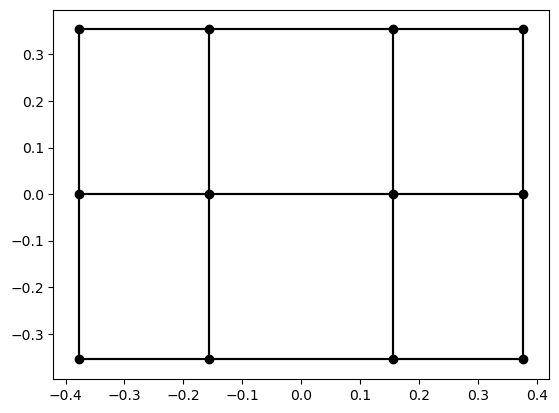

In [3]:
for i in range(n):
    plt.scatter(eigvecs[i, 1], eigvecs[i, 2], c='k')
for i in range(n):
    for j in range(n):
        if A[i, j] == 1:
            plt.plot([eigvecs[i, 1], eigvecs[j, 1]],
                     [eigvecs[i, 2], eigvecs[j, 2]], c='k')

## Eigenvalues and eigenvectors of predecessor follower and bidirectional

In [4]:
def pf_graph(n):
    A = np.zeros((n, n))
    D = np.zeros((n, n))
    L = np.zeros((n, n))
    P = np.zeros((n, n))
    for i in range(1, n):
        A[i, i-1] = 1
    D = np.diag(A.sum(axis=1))
    L = D - A
    P[0, 0] = 1
    return A, D, L, P

def plf_graph(n):
    A = np.zeros((n, n))
    D = np.zeros((n, n))
    L = np.zeros((n, n))
    P = np.zeros((n, n))
    for i in range(1, n):
        A[i, i-1] = 1
    D = np.diag(A.sum(axis=1))
    L = D - A
    P = np.eye(n)
    return A, D, L, P

def bd_graph(n):
    A = np.zeros((n, n))
    D = np.zeros((n, n))
    L = np.zeros((n, n))
    P = np.zeros((n, n))
    for i in range(1, n):
        A[i, i-1] = 1
        A[i-1, i] = 1
    A[1, 0] = 1
    D = np.diag(A.sum(axis=1))
    L = D - A
    P[0, 0] = 1
    return A, D, L, P

In [5]:
N = 50
A_pf, D_pf, L_pf, P_pf = pf_graph(N)
A_plf, D_plf, L_plf, P_plf = plf_graph(N)
A_bd, D_bd, L_bd, P_bd = bd_graph(N)

### Analyzing $L$

In [6]:
eigvals_pf, eigvecs_pf = np.linalg.eig(L_pf)
pf_inds = np.argsort(eigvals_pf)
eigvals_pf = eigvals_pf[pf_inds]
eigvecs_pf = eigvecs_pf[:, pf_inds]

eigvals_plf, eigvecs_plf = np.linalg.eig(L_plf)
plf_inds = np.argsort(eigvals_plf)
eigvals_plf = eigvals_plf[plf_inds]
eigvecs_plf = eigvecs_plf[:, plf_inds]

eigvals_bd, eigvecs_bd = np.linalg.eig(L_bd)
bd_inds = np.argsort(eigvals_bd)
eigvals_bd = eigvals_bd[bd_inds]
eigvecs_bd = eigvecs_bd[:, bd_inds]

print("Predecessor follower:")
print("min eigenvalue: %.2f" % eigvals_pf[0])
print("max eigenvalue: %.2f" % eigvals_pf[-1])

print("\nPredecessor-leader follower:")
print("min eigenvalue: %.2f" % eigvals_plf[0])
print("max eigenvalue: %.2f" % eigvals_plf[-1])

print("\nBidirectional:")
print("min eigenvalue: %.2f" % eigvals_bd[0])
print("max eigenvalue: %.2f" % eigvals_bd[-1])

Predecessor follower:
min eigenvalue: 0.00
max eigenvalue: 1.00

Predecessor-leader follower:
min eigenvalue: 0.00
max eigenvalue: 1.00

Bidirectional:
min eigenvalue: 0.00
max eigenvalue: 4.00


### Analyzing $L + P$

In [7]:
eigvals_pf, eigvecs_pf = np.linalg.eig(L_pf + P_pf)
pf_inds = np.argsort(eigvals_pf)
eigvals_pf = eigvals_pf[pf_inds]
eigvecs_pf = eigvecs_pf[:, pf_inds]

eigvals_plf, eigvecs_plf = np.linalg.eig(L_plf + P_plf)
plf_inds = np.argsort(eigvals_plf)
eigvals_plf = eigvals_plf[plf_inds]
eigvecs_plf = eigvecs_plf[:, plf_inds]

eigvals_bd, eigvecs_bd = np.linalg.eig(L_bd + P_pf)
bd_inds = np.argsort(eigvals_bd)
eigvals_bd = eigvals_bd[bd_inds]
eigvecs_bd = eigvecs_bd[:, bd_inds]

print("Predecessor follower:")
print("min eigenvalue: %.2f" % eigvals_pf[0])
print("max eigenvalue: %.2f" % eigvals_pf[-1])

print("\nPredecessor-leader follower:")
print("min eigenvalue: %.2f" % eigvals_plf[0])
print("max eigenvalue: %.2f" % eigvals_plf[-1])

print("\nBidirectional:")
print("min eigenvalue: %.2f" % eigvals_bd[0])
print("max eigenvalue: %.2f" % eigvals_bd[-1])

Predecessor follower:
min eigenvalue: 1.00
max eigenvalue: 1.00

Predecessor-leader follower:
min eigenvalue: 1.00
max eigenvalue: 2.00

Bidirectional:
min eigenvalue: 0.00
max eigenvalue: 4.00


### Analyzing $(D + P)^{-1} A$

In [8]:
eigvals_pf, eigvecs_pf = np.linalg.eig(np.linalg.inv(D_pf + P_pf) @ A_pf)
pf_inds = np.argsort(eigvals_pf)
eigvals_pf = eigvals_pf[pf_inds]
eigvecs_pf = eigvecs_pf[:, pf_inds]

eigvals_plf, eigvecs_plf = np.linalg.eig(np.linalg.inv(D_plf + P_plf) @ A_plf)
plf_inds = np.argsort(eigvals_plf)
eigvals_plf = eigvals_plf[plf_inds]
eigvecs_plf = eigvecs_plf[:, plf_inds]

eigvals_bd, eigvecs_bd = np.linalg.eig(np.linalg.inv(D_bd + P_bd) @ A_bd)
bd_inds = np.argsort(eigvals_bd)
eigvals_bd = eigvals_bd[bd_inds]
eigvecs_bd = eigvecs_bd[:, bd_inds]

print("Predecessor follower:")
print("min eigenvalue: %.2f" % eigvals_pf[0])
print("max eigenvalue: %.2f" % eigvals_pf[-1])

print("\nPredecessor-leader follower:")
print("min eigenvalue: %.2f" % eigvals_plf[0])
print("max eigenvalue: %.2f" % eigvals_plf[-1])

print("\nBidirectional:")
print("min eigenvalue: %f" % eigvals_bd[0])
print("max eigenvalue: %f" % eigvals_bd[-1])

Predecessor follower:
min eigenvalue: 0.00
max eigenvalue: 0.00

Predecessor-leader follower:
min eigenvalue: 0.00
max eigenvalue: 0.00

Bidirectional:
min eigenvalue: -0.999507
max eigenvalue: 0.999507
